In [1]:
import znflow

In [2]:
class Node(znflow.Node):
    inputs = znflow.Parameters()
    outputs = znflow.Parameters(None)

In [3]:
Node(inputs=25).inputs

25

In [4]:
with znflow.DAG() as dag:
    node1 = Node(inputs=25)
    node2 = Node(inputs=42)
    
    node1 >> node2

print(dag)
print(dag.graph.edges)
print(dag.graph.get_edge_data(node1, node2))

DAG([Node(inputs=25, outputs=None), Node(inputs=42, outputs=None)])
[(Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 0)]
{0: {'in_attribute': None, 'out_attribute': None}}


In [5]:
with znflow.DAG() as dag:
    node1 = Node(inputs=25)
    node2 = Node(inputs=42)
    
    node1.outputs >> node2.inputs

print(dag)
print(dag.graph.edges)
print(dag.graph.get_edge_data(node1, node2))

DAG([Node(inputs=25, outputs=None), Node(inputs=42, outputs=None)])
[(Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 0)]
{0: {'in_attribute': 'outputs', 'out_attribute': 'inputs'}}


In [6]:
with znflow.DAG() as dag:
    node1 = Node(inputs=25)
    node2 = Node(inputs=42)
    
    node1.outputs >> node2.inputs >> node1.outputs

print(dag)
print(dag.graph.edges)
print(dag.graph.get_edge_data(node1, node2))
print(dag.graph.get_edge_data(node2, node1))

DAG([Node(inputs=25, outputs=None), Node(inputs=42, outputs=None)])
[(Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 0), (Node(inputs=42, outputs=None), Node(inputs=25, outputs=None), 0)]
{0: {'in_attribute': 'outputs', 'out_attribute': 'inputs'}}
{0: {'in_attribute': 'inputs', 'out_attribute': 'outputs'}}


In [7]:
with znflow.DAG() as dag:
    node1 = Node(inputs=25)
    node2 = Node(inputs=42)
    
    node1.outputs >> node2.inputs
    
    node2.inputs << node1.outputs

print(dag)
print(dag.graph.edges)
print(dag.graph.get_edge_data(node1, node2))

DAG([Node(inputs=25, outputs=None), Node(inputs=42, outputs=None)])
[(Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 0), (Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 1)]
{0: {'in_attribute': 'outputs', 'out_attribute': 'inputs'}, 1: {'in_attribute': 'outputs', 'out_attribute': 'inputs'}}


In [8]:
dag.graph.get_edge_data(node1, node2)

{0: {'in_attribute': 'outputs', 'out_attribute': 'inputs'},
 1: {'in_attribute': 'outputs', 'out_attribute': 'inputs'}}

In [9]:
for x in dag.graph:
    print(x)

Node(inputs=25, outputs=None)
Node(inputs=42, outputs=None)


In [10]:
dag.graph.edges

OutMultiEdgeView([(Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 0), (Node(inputs=25, outputs=None), Node(inputs=42, outputs=None), 1)])

In [11]:
import networkx as nx

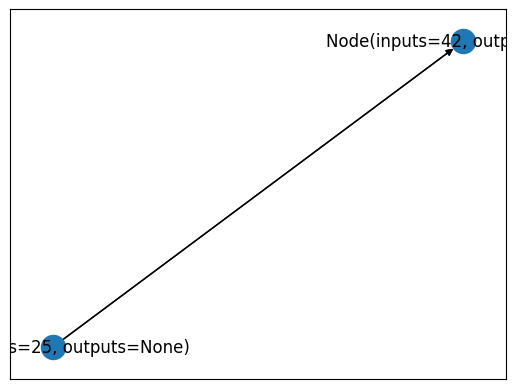

In [12]:
nx.draw_networkx(dag.graph)

In [21]:
with znflow.DAG() as dag:
    # print(Node(inputs=1) >> Node(inputs=2))
    start = Node(inputs=1)
    start >> Node(inputs=2) >> Node(inputs=3) >> Node(inputs=4) >> Node(inputs=5) >> start

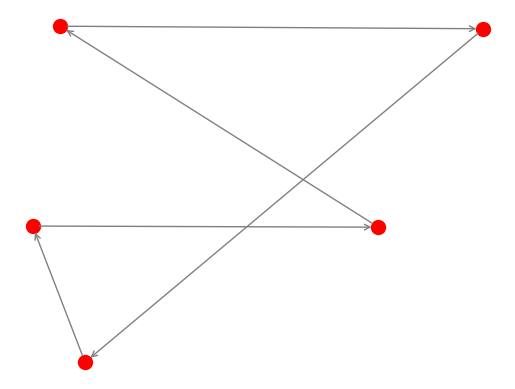

In [22]:
import matplotlib.pyplot as plt
G = dag.graph

pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()